# Journey through some Exploration Algorithms

### Introduction: 
    Exploration is cool

### Requirements:
- [Jupyter](http://jupyter.readthedocs.io/en/latest/install.html)
- [Explauto](https://github.com/flowersteam/explauto)

To run this notebook:

    jupyter notebook main.ipynb

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from numpy import pi, array
from matplotlib import animation
from IPython.display import HTML, display
from ipywidgets import interact_manual


from environment import Arm, Ball, ArmBall
from explauto.environment.dynamic_environment import DynamicEnvironment
from modular_environment import HierarchicalEnvironment

## I. Exploring the movements of a robotic arm

Configuration of a dynamic environment with an arm and a ball to catch.

The 3 joints are controlled through DMPs with 3 basis functions (9 motor parameters in total).

The environments can be instantiated either with the following configuration, or directly with 'ArmBall()'.

In [2]:
arm_config = dict(
    m_mins=[-1.] * 3,
    m_maxs=[1.] * 3, 
    s_mins=[-1.] * 3,
    s_maxs=[1.] * 3, 
    lengths=[0.5, 0.3, 0.2], 
    angle_shift=0.5,
    rest_state=[0.] * 3)

ball_config = dict(
    m_mins=[-1.] * 2,
    m_maxs=[1.] * 2, 
    s_mins=[-1.] * 2,
    s_maxs=[1.] * 2,
    size=0.05,
    initial_position=[0.6, 0.6],
    color="y")
        
arm_ball_cfg = dict(
    m_mins=[-1.] * 3,
    m_maxs=[1.] * 3,
    s_mins=[-1.] * 2,
    s_maxs=[1.] * 2,
    top_env_cls=Ball, 
    lower_env_cls=Arm, 
    top_env_cfg=ball_config, 
    lower_env_cfg=arm_config, 
    fun_m_lower= lambda m:m,
    fun_s_lower=lambda m,s:s[0:2],
    fun_s_top=lambda m,s_lower,s:s)

dynamic_environment_config = dict(
    env_cfg=arm_ball_cfg,
    env_cls=HierarchicallyCombinedEnvironment,
    m_mins=[-1.] * 3 * 3, 
    m_maxs=[1.] * 3 * 3, 
    s_mins=[-1] * 3 * 2,
    s_maxs=[1] * 3 * 2,
    n_bfs=3,
    move_steps=50, 
    n_dynamic_motor_dims=3,
    n_dynamic_sensori_dims=2, 
    max_params=1000)

environment = DynamicEnvironment(**dynamic_environment_config)

#environment = ArmBall()

Control the arm through the 9 following sliders (and hit "Run" button).

Try to catch the ball !

In [6]:
# Had to run 'jupyter nbextension enable --py --sys-prefix widgetsnbextension'
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
fig, ax = plt.subplots()

def movement(m1=0., m2=0., m3=0., m4=0., m5=0., m6=0., m7=0., m8=0., m9=0.):
    environment.update(array([m1, m2, m3, m4, m5, m6, m7, m8, m9]))
    display(HTML(environment.plot(fig, ax)))
    
interact_manual(movement, m1=(-1., 1., 0.1), m2=(-1., 1., 0.1), m3=(-1., 1., 0.1), 
                          m4=(-1., 1., 0.1), m5=(-1., 1., 0.1), m6=(-1., 1., 0.1), 
                          m7=(-1., 1., 0.1), m8=(-1., 1., 0.1), m9=(-1., 1., 0.1))


## II. Random Motor Babbling

Populating the interactive namespace from numpy and matplotlib


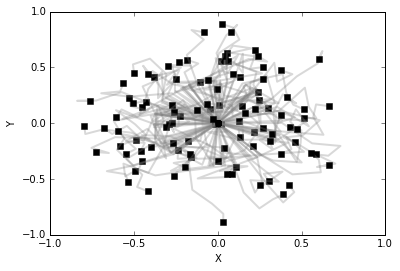

In [15]:
%pylab inline
ax = axes()

dimensions = 5

config = make_arm_config(dimensions, 2*pi, array([-1., -1.]), array([1., 1.]), 1.5, 0.)
environment = SimpleArmEnvironment(**config)


random_motors = environment.random_motors(n=100)

for m in random_motors:
    environment.plot_arm(ax, m, alpha=0.3)

## III. Random Goal Babbling


## IV. Active Goal Babbling

Active learning is necessary

## V. More complex environment

Test AGB

=> Need to change the representation

## VI. Model Babbling